# Vue 07 State Management

## State Manangement

### 개요

#### State Management
##### 상태 관리
Vue 컴포넌트 이미 반응형 상태를 관리하고 있음

- > 상태 === 데이터

#### 컴포넌트 구조의 단순화
- 상태(State)
    - 앱 구동에 필요한 기본 데이터

- 뷰(View)
    - 상태를 선언적으로 매핑하여 시각화

- 기능(Actions)
    - 뷰에서 사용자 입력에 대해 반응적으로 상태를 변경할 수 있게 정의된 동작
```html
<template> 
    <!-- 뷰(View) --> 
     <div>{{ count }}</div> 
</template> 

<script setup> 
import { ref } from 'vue' 

// 상태(State) 
const count = ref(0) 

// 기능(Actions) 
const increment = function () { 
    count.value++ 
} 
</script>
```
- > "단방향 데이터 흐름"의 간단한 표현

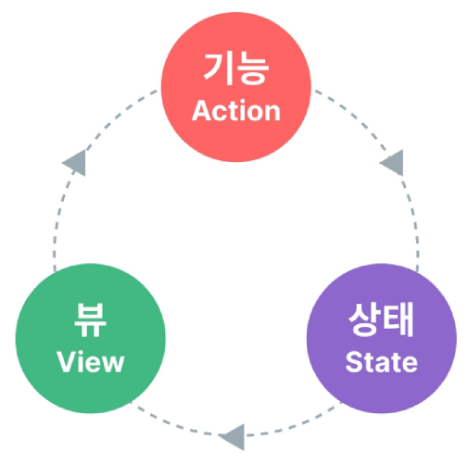

#### 상태 관리의 단순성이 무너지는 시점 
- “여러 컴포넌트가 상태를 공유할 때" 
    1. 여러 뷰가 동일한 상태에 종속되는 경우 
    2. 서로 다른 뷰의 기능이 동일한 상태를 변경시켜야 하는 경우

1. 여러 뷰가 동일한 상태에 종속되는 경우 공유 
    - 상태를 공통 조상 컴포넌트로 "끌어올린" 다음 props로 전달하는 것 
    - 하지만 계층 구조가 깊어질 경우 비효율적, 관리가 어려워 짐

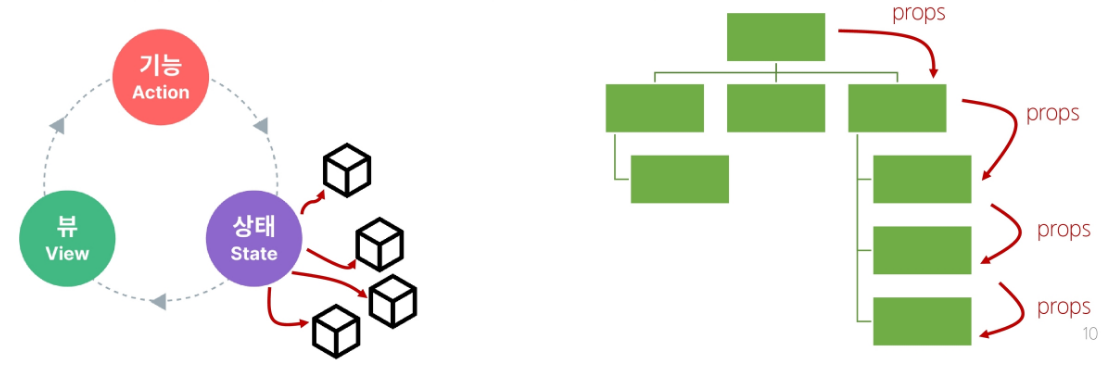

2. 서로 다른 뷰의 기능이 동일한 상태를 변경시켜야 하는 경우 
    - 발신(emit)된 이벤트를 통해 상태의 여러 복사본을 변경 및 동기화 하는 것 
    - 마찬가지로 관리의 패턴이 깨지기 쉽고 유지 관리할 수 없는 코드가 됨

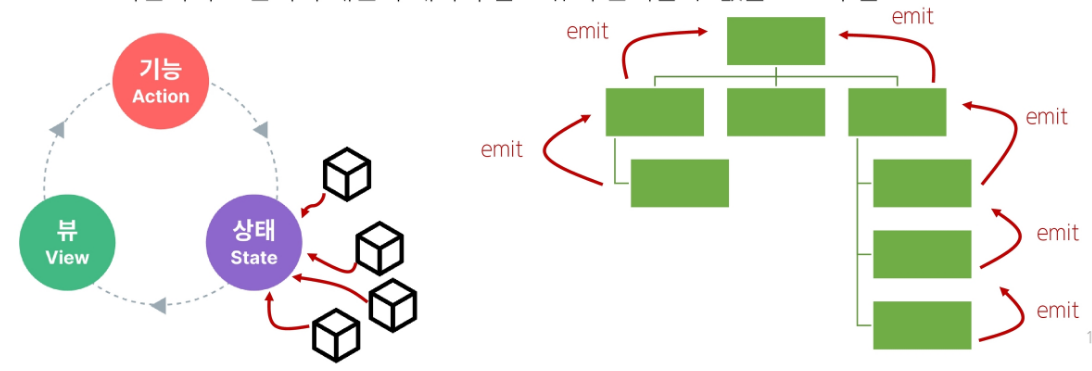

#### 해결책
- 각 컴포넌트의 공유 상태를 추출하여, 전역에서 참조할 수 있는 저장소에서 관리

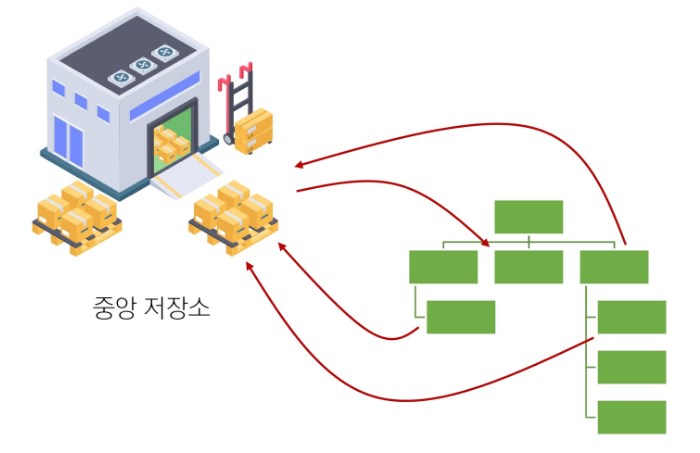

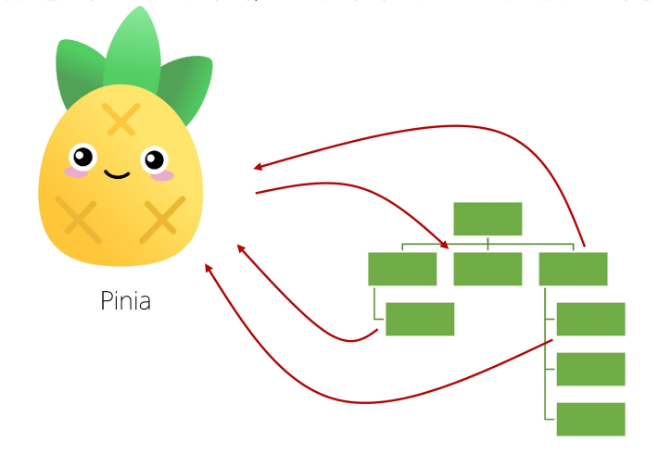

- 컴포넌트 트리는 하나의 큰 View가 되고 모든 컴포넌트는 트리 계층 구조에 관계 없이 상태에 접근하거나 기능을 사용할 수 있음 

- Vue의 공식 상태 관리 라이브러리 === `“Pinia”`

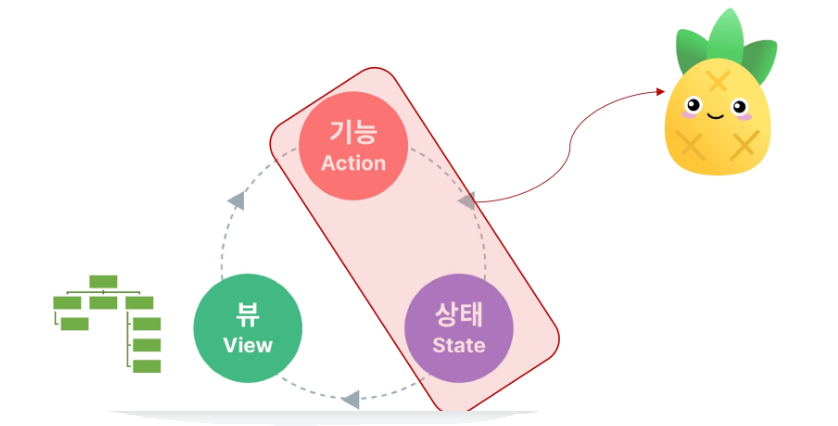

## State management library (Pinia)

### Pinia

#### 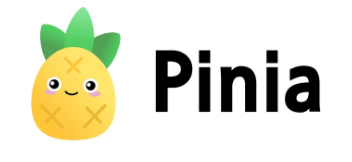

Vue 공식 상태 관리 라이브러리

#### Pinia 설치 
Vite 프로젝트 빌드 시 Pinia 라이브러리 추가

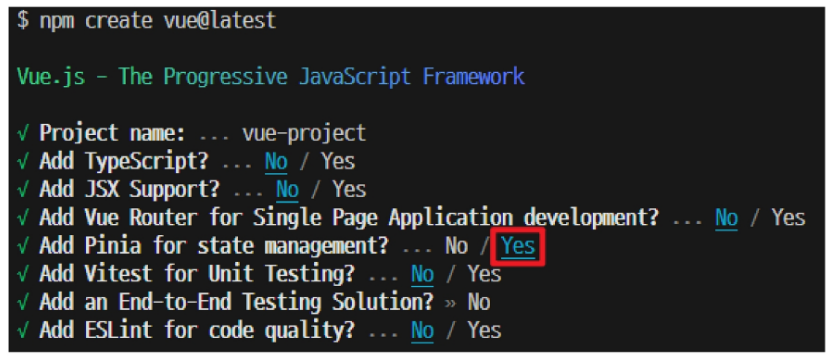

#### Vue 프로젝트 구조 변화 
stores 폴더 신규 생성

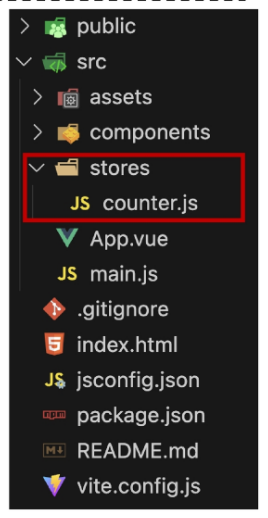

### Pinia 구조

#### Pinia 구성 요소
##### 1. store 

##### 2. state 
##### 3. getters 
##### 4. actions 
##### 5. plugin

#### 1. Pinia 구성 요소 - ‘store’
- 중앙 저장소 

- State management library (Pinia)
- 모든 컴포넌트가 공유하는 상태, 기능 등이 작성됨 
- > defineStore()의 반환 값의 이름은 use와 store를 사용하는 것을 권장 
- > defineStore()의 첫번째 인자는 애플리케이션 전체에 설쳐 사용하는 store의 고유 ID

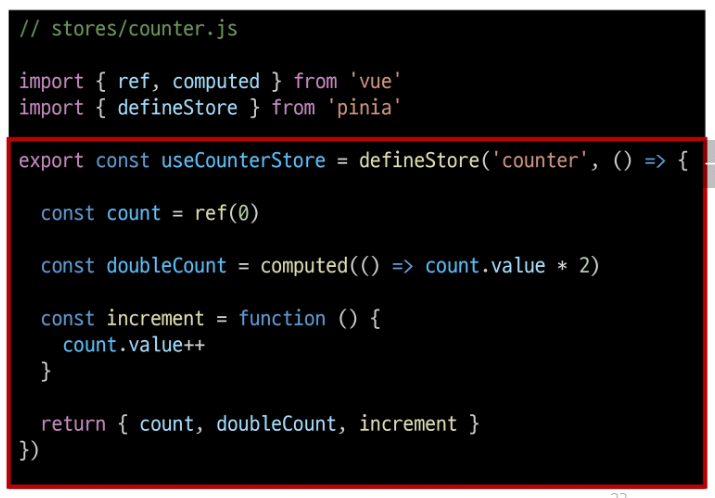

#### 2. Pinia 구성 요소 - 'state'
- 반응형 상태(데이터) 

- ref() === state

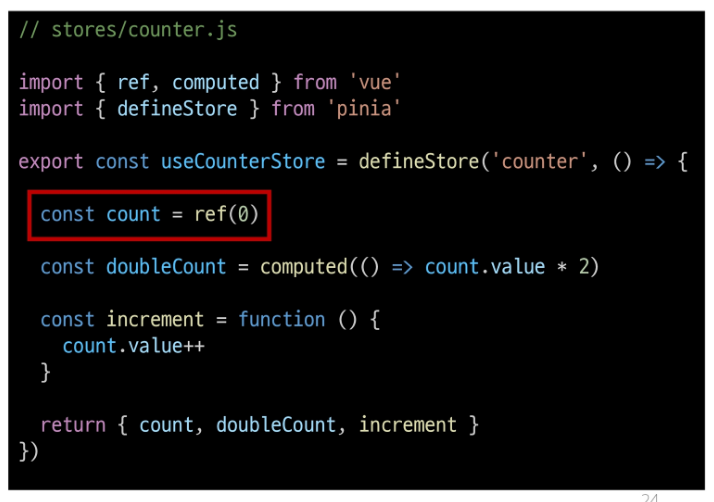

#### 3. Pinia 구성 요소 - 'getters' 
- 계산된 값 

- computed() === getters

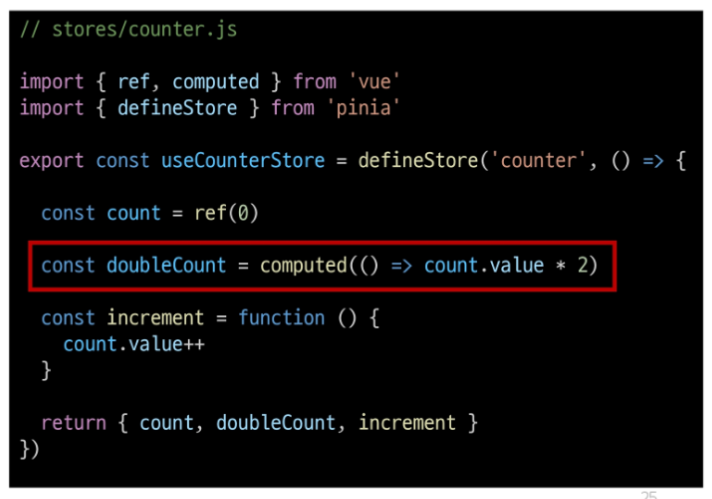

#### 4.Pinia 구성 요소 - 'actions'
- 메서드

- functions() === actions

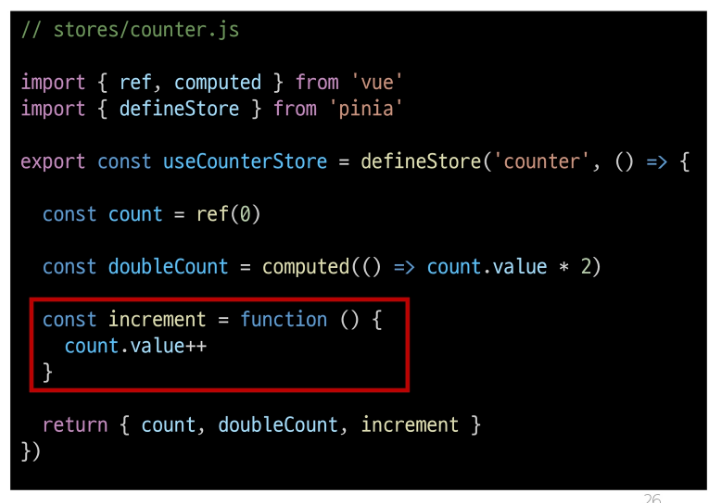

#### Setup Stores의 반환 값
- pinia의 상태들을 사용하려면 반드시 반환해야 함

- `store에서는 공유하지 않는 private한 상태 속성을 가지지 않음`

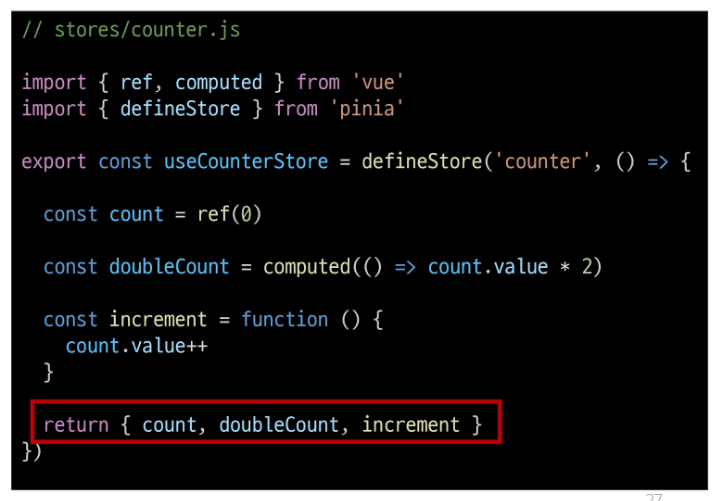

#### 5. Pinia 구성 요소 - 'plugin'
- 애플리케이션의 상태 관리에 필요한 추가 가능을 제공하거나 확장하는 도구나 모듈

- 애플리케이션의 상태 관리를 더욱 간편하고 유연하게 만들어주며 패키지 매니저로 설치 이후 별도 설정을 통해 추가 됨

#### Pinia 구성 요소 정리
- Pinia는 **store**라는 저장소를 가짐

- **store**는 **state**, **getters**, **actions**으로 이루어지며 각각 **ref()**, **computed()**, **function()**과 동일함

### Pinia 구성 요소 활용

#### State
- 각 컴포넌트 깊이에 관계 없이 store 인스턴스로 state에 접근하여 직접 읽고 쓸 수 있음

- 만약 store에 state를 정의하지 않았다면 컴포넌트에 새로 추가할 수 없음
```js
// App.vue 

import { useCounterStore } from '@/stores/counter' 

const store = useCounterStore() 

// state 참조 및 변경 
console.log(store.count) 
const newNumber = store.count + 1
```
```html
<!-- App.vue --> 
 
 <template> 
    <div> 
        <p>state: {{ store.count }}</p> 
    </div> 
</template>
```

#### Getters
store의 모든 getters 또한 state처럼 직접 접근 할 수 있음
```js
// App.vue 

// getters 참조 
console.log(store.doubleCount)
```
```html
<!-- App.vue --> 

<template> 
    <div> 
        <p>getters: {{ store.doubleCount }}</p> 
    </div> 
</template>
```

#### Actions 
- store의 모든 actions 또한 직접 접근 및 호출 할 수 있음 

- getters와 달리 `state 조작`, `비동기`, `API 호출`이나 `다른 로직`을 진행할 수 있음
```js
// App.vue 

// actions 호출 
store.increment()
```
```html
<!-- App.vue --> 
<template> 
    <div> 
        <button @click="store.increment()">+++</button>
    </div>
</template>
```

#### Vue devtools로 Pinia 구성 요소 확인하기
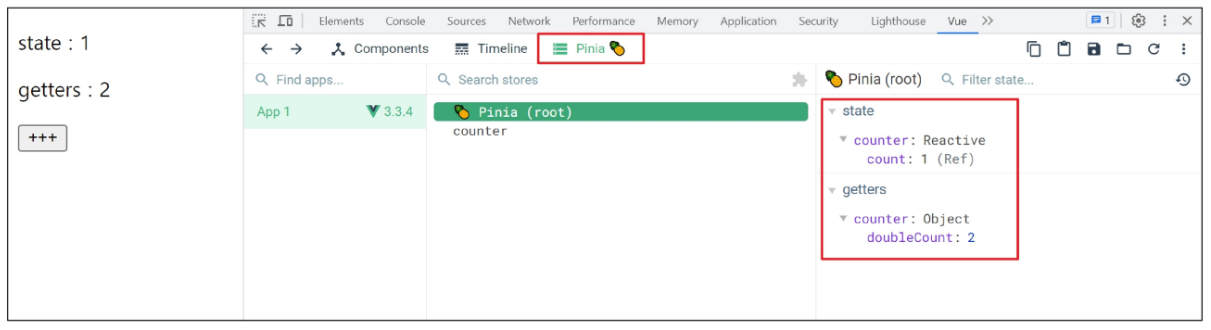

## Pinia 실습

### 개요

#### Pinia를 활용한 Todo 프로젝트 구현 
- Todo CRUD 구현 

- Todo 개수 계산 
    - 완료된 Todo 개수

#### 컴포넌트 구성
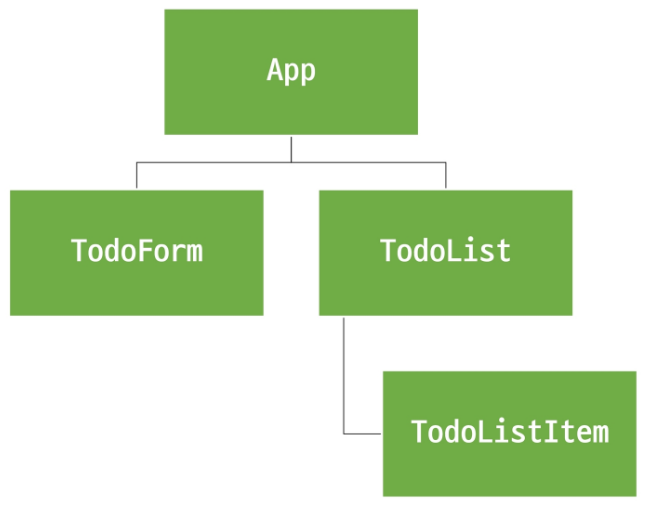

### 사전 준비

#### 사전준비
- 초기 생성된 컴포넌트 모두 삭제 (App.vue 제외) 

- src/assets 내부 파일 모두 삭제 
- main.js 해당 코드 삭제

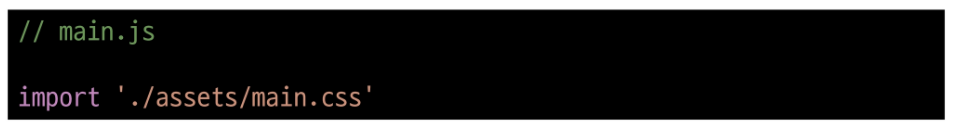

- TodoListItem 컴포넌트 작성

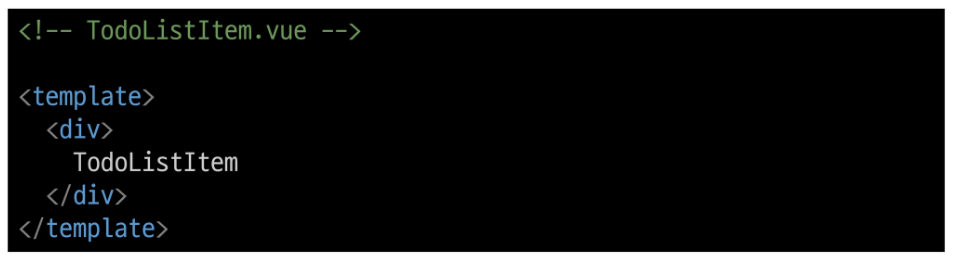

- TodoList 컴포넌트 작성 

- TodoListItem 컴포넌트 등록

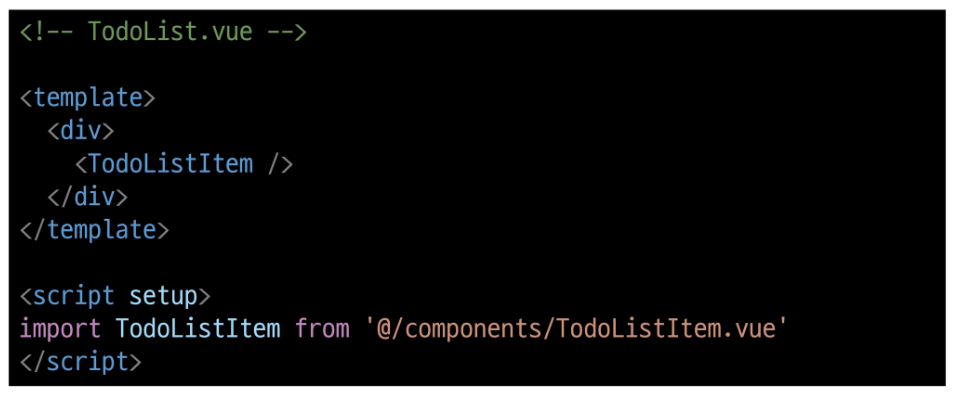

- TodoForm 컴포넌트 작성

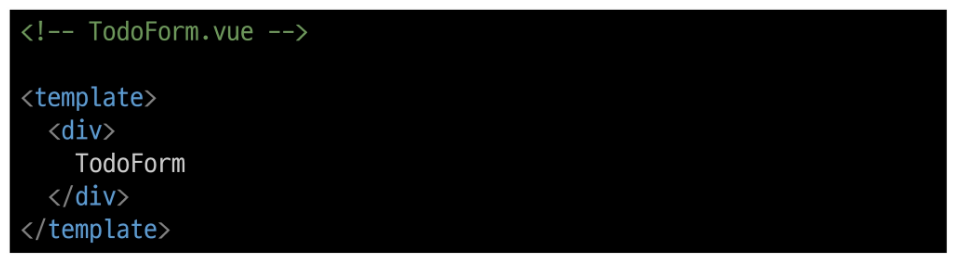

- App 컴포넌트에 TodoList, TodoForm 컴포넌트 등록

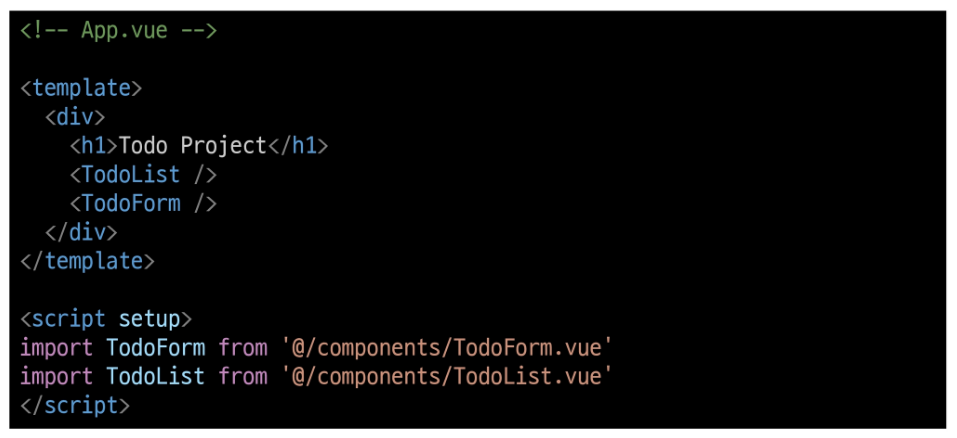

- 컴포넌트 구성 확인

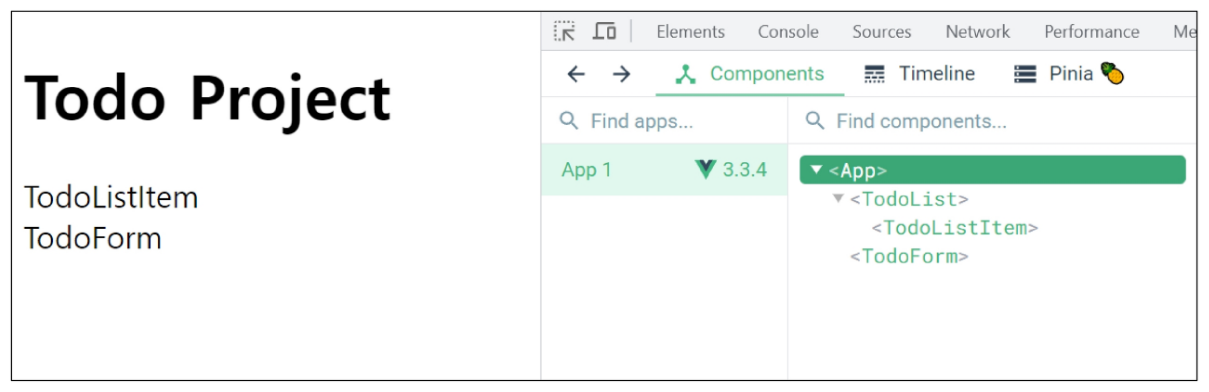

### Read Todo

#### Todo 조회
- store에 임시 todos 목록 state를 정의

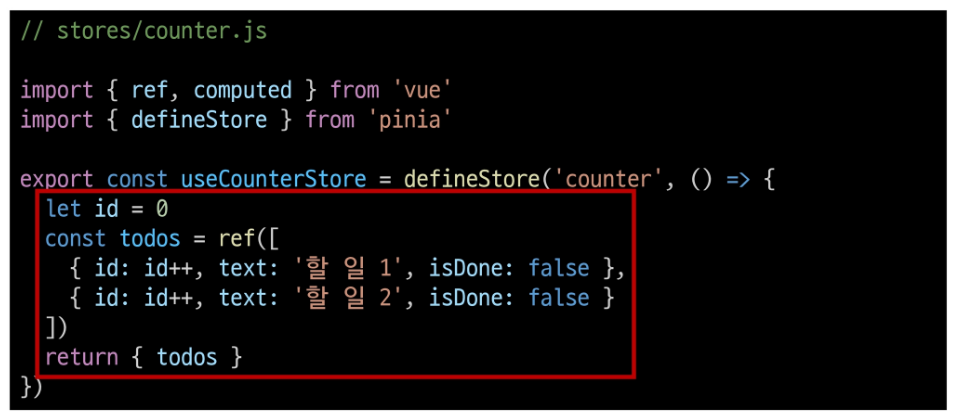

- store의 todos state를 참조 

- 하위 컴포넌트인 TodoListItem을 반복 하면서 개별 todo를 props로 전달

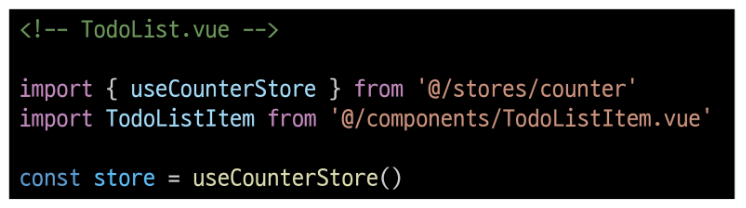

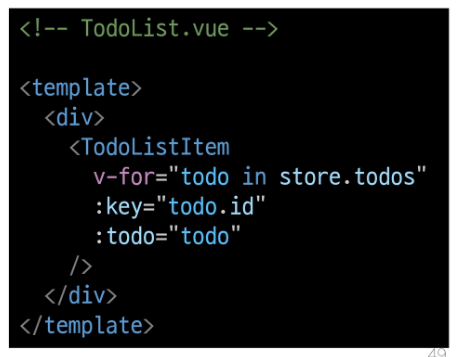

- props 정의 후 데이터 출력 확인

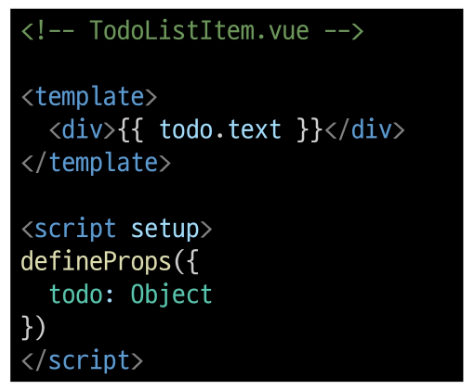

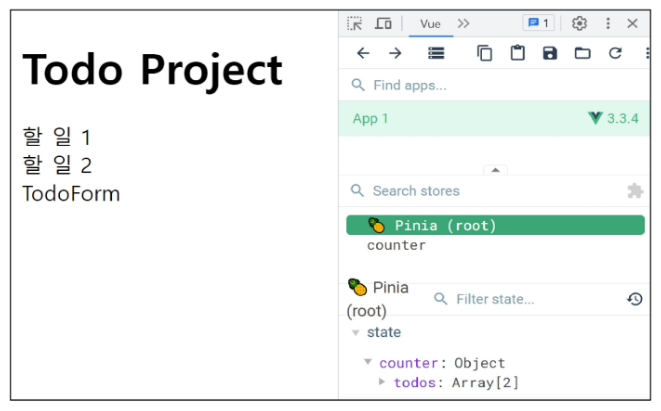

### Create Todo

- todos 목록에 todo를 생성 및 추가하는 addTodo 액션 정의

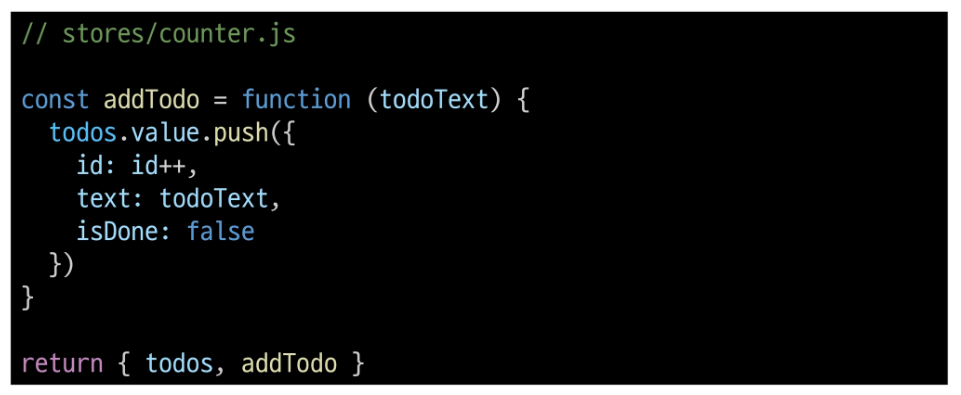

- TodoForm에서 실시간으로 입력되는 사용자 데이터를 양방향 바인딩하여 반응형 변수로 할당

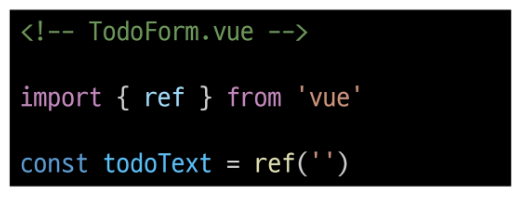

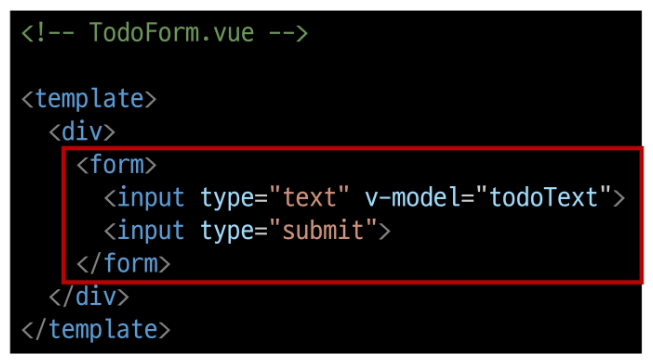

- submit 이벤트가 발생 했을 때 사용자 입력 텍스트를 인자로 전달하여 store에 정의한 addTodo 액션 메서드를 호출

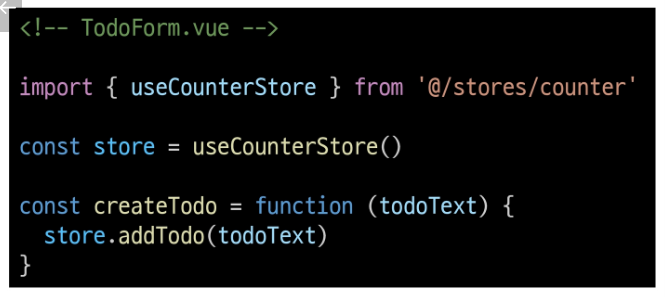

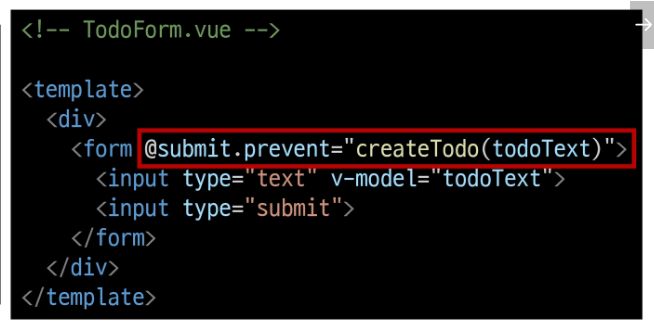

- form 요소를 선택하여 todo 입력 후 input 데이터를 초기화 할 수 있도록 처리

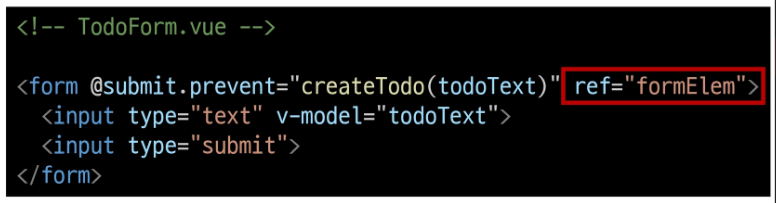

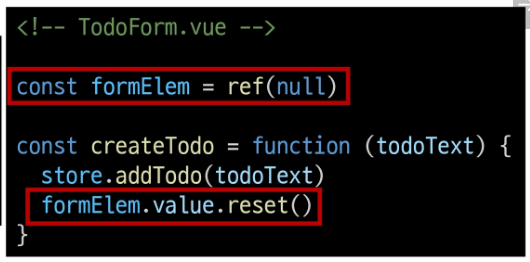

- 결과 확인

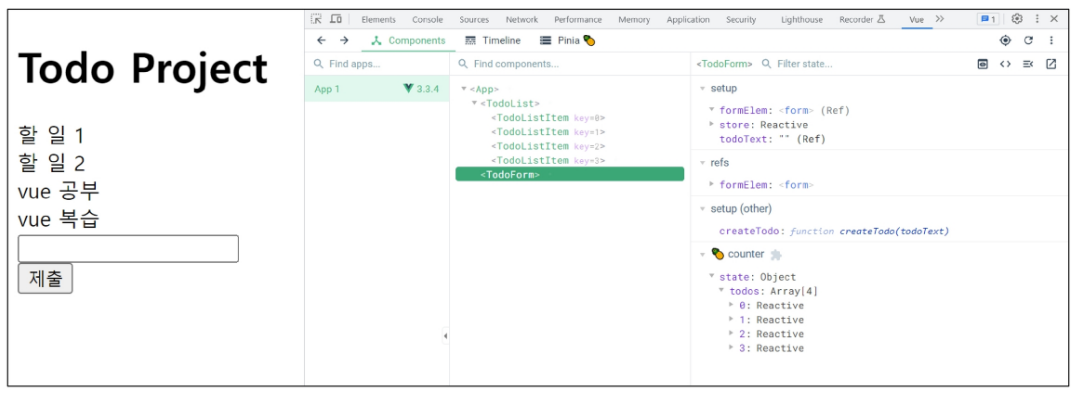

### Delete Todo

#### Todo 삭제
- todos 목록에서 특정 todo를 삭제하는 deleteTodo 액션 정의

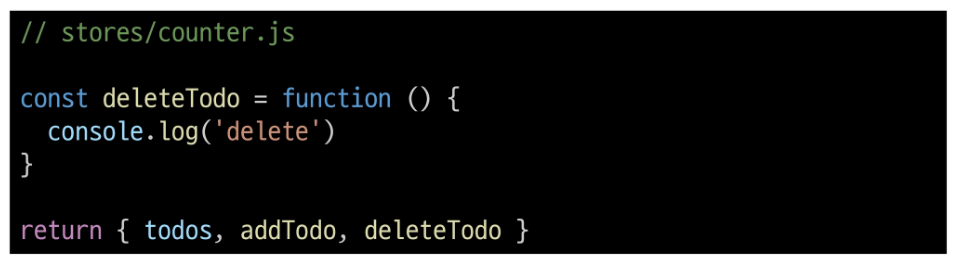

- 각 todo에 삭제 버튼을 작성

- 버튼을 클릭하면 선택된 todo의 id를 인자로 전달해 deleteTodo 메서드 호출

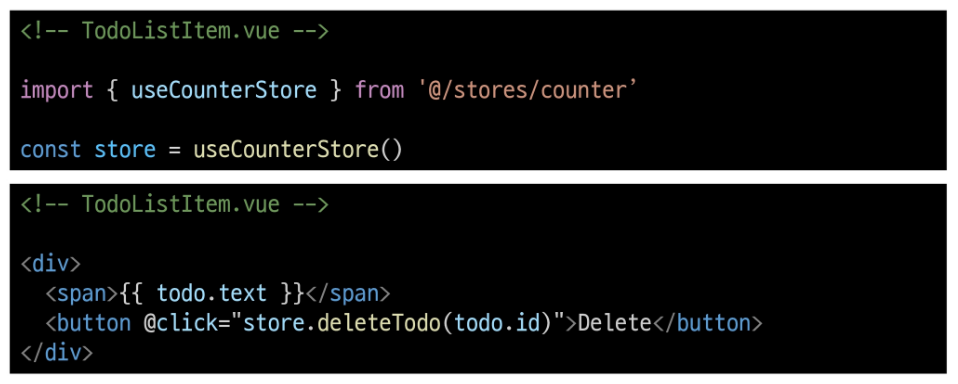

- 전달받은 todo의 id값을 활용해 선택된 todo의 인덱스를 구함

- 특정 인덱스 todo를 삭제 후 todos 배열을 재설정

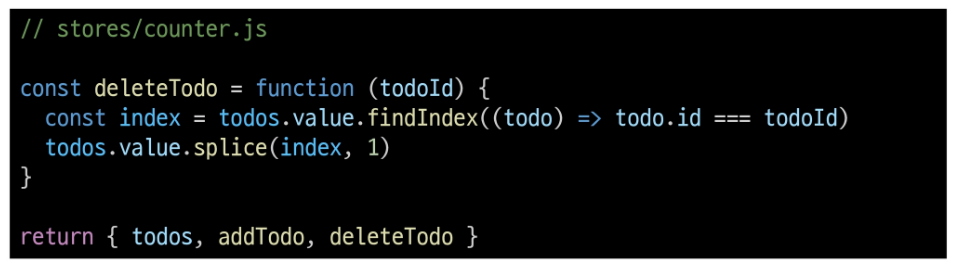

- 결과 확인

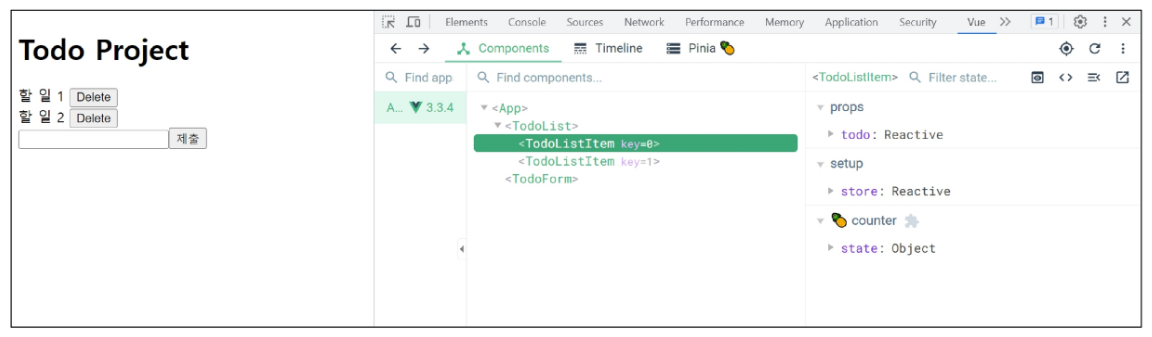

### Update Todo

#### Todo 수정
- "각 todo 상태의 isDone 속성을 변경하여 todo의 완료 유무 처리하기" 

- 완료된 todo에는 취소선 스타일 적용하기
- todos 목록에서 특정 todo의 isDone 속성을 변경하는 updateTodo 액션 정의

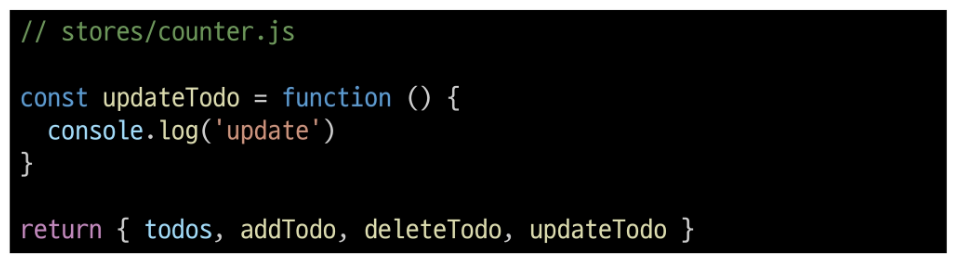

- todo 내용을 클릭하면 선택된 todo의 id를 인자로 전달해 updateTodo 메서드를 호출

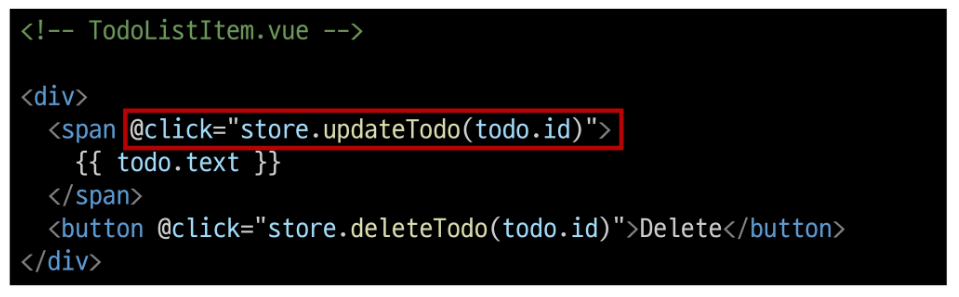

- 전달받은 todo의 id 값을 활용해 선택된 todo와 동일 todo를 목록에서 검색 

- 일치하는 todo 데이터의 isDone 속성 값을 반대로 재할당 후 새로운 todo 목록 반환

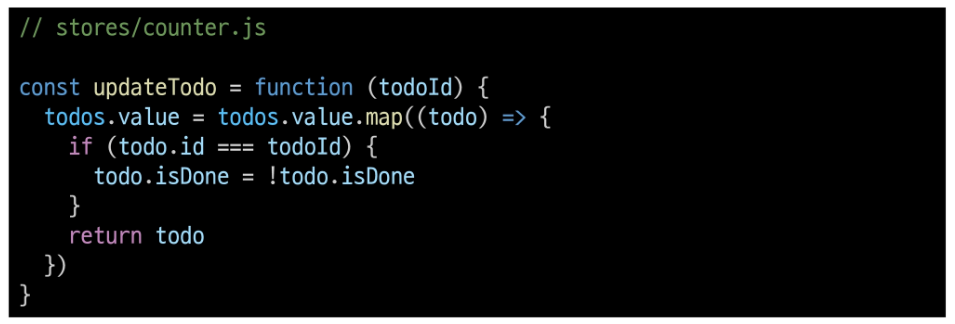

- todo 객체의 isDone 속성 값에 따라 스타일 바인딩 적용하기

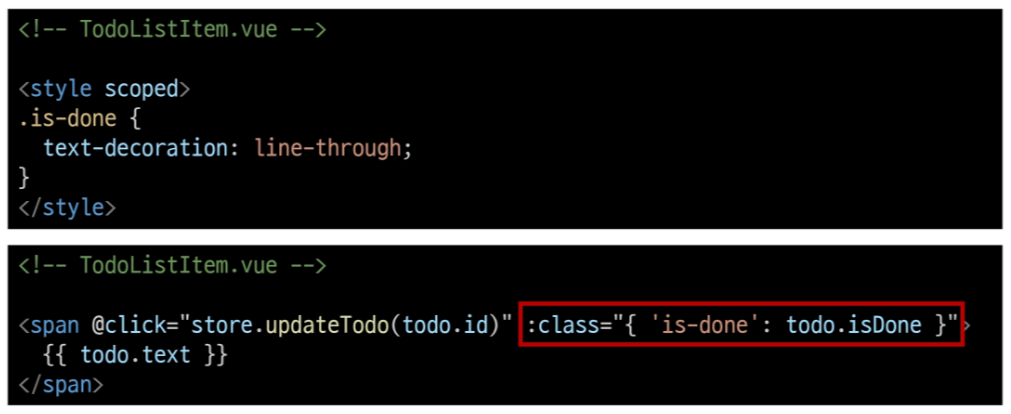

- 결과 확인

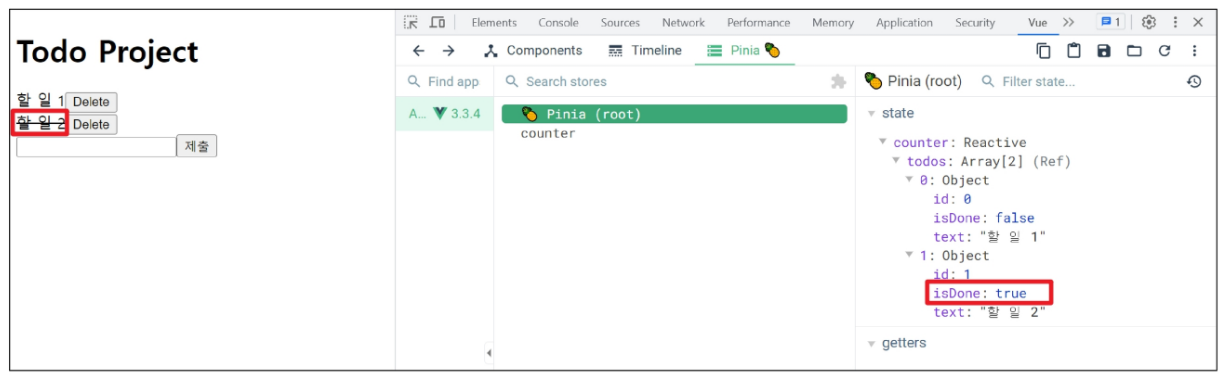

### Counting Todo

#### 완료된 todo 갯수 계산
- todos 배열의 길이 값을 반환하는 함수 doneTodosCount 작성 (getters)

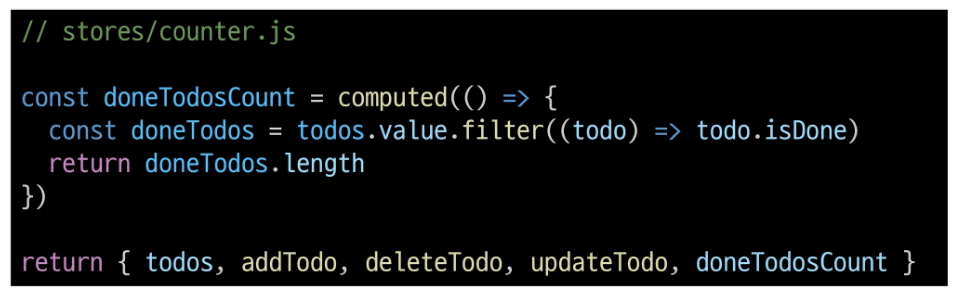

- App 컴포넌트에서 doneTodosCount getter를 참조

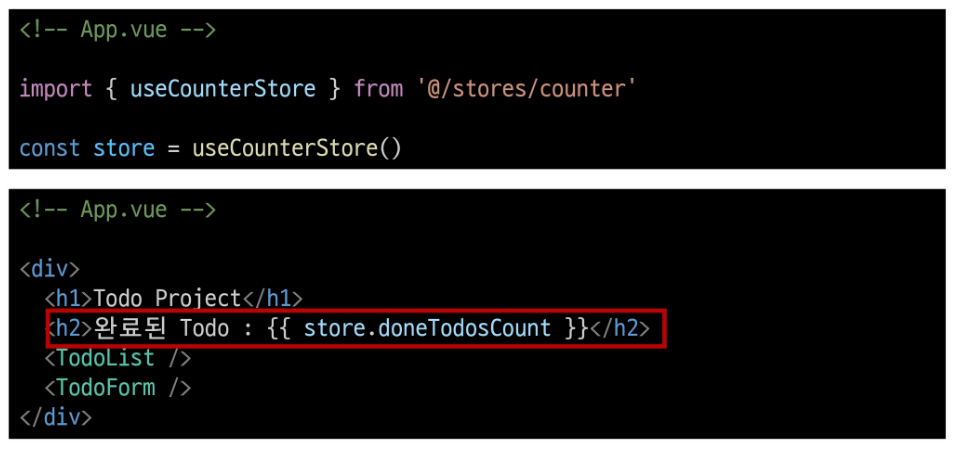

### Local Storage


#### Local Storage
브라우저 내에 key-value 쌍을 저장하는 웹 스토리지 객체

#### Local Storage 특징 
- 페이지를 새로 고침하고 브라우저를 다시 실행해도 데이터가 유지 

- 쿠키와 다르게 네트워크 요청 시 서버로 전송되지 않음 
- 여러 탭이나 창 간에 데이터를 공유 할 수 있음

#### Local Storage 사용 목적 
웹 애플리케이션에서 사용자 설정, 상태 정보, 캐시 데이터 등을 클라이언트 측에서 보관하여 웹사이트의 성능을 향상시키고 사용자 경험을 개선하기 위함

#### pinia-plugin-persistedstate 
- Pinia의 플러그인(plugin) 중 하나 

- 웹 애플리케이션의 상태(state)를 브라우저의 local storage나 session storage에 영구적으로 저장하고 복원하는 기능을 제공 
- https://prazdevs.github.io/pinia-plugin-persistedstate/

#### pinia-plugin-persistedstate 설정
- 설치 및 등록 
```shell
$ npm i pinia-plugin-persistedstate
```
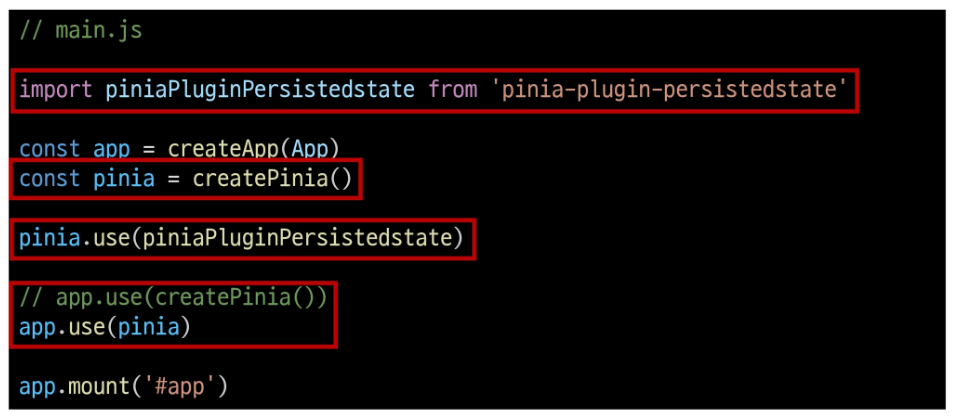

- defineStore()의 3번째 인자로 관련 객체 추가

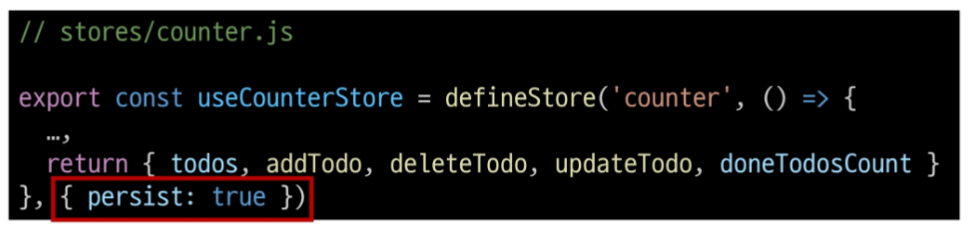

- 적용 결과 (개발자도구 → Application → Local Storage) 
    - 브라우저의 Local Storage에 저장되는 todos state 확인

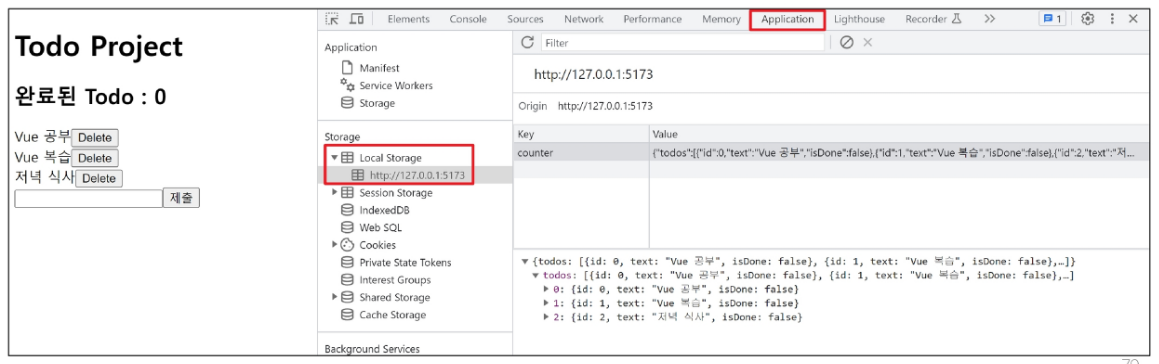

## 참고

### Pinia 활용 시점

#### 이제 모든 데이터를 store에서 관리해야 할까?
- Pinia를 사용한다고 해서 모든 데이터를 state에 넣어야 하는 것은 아님 

- pass props, emit event를 함께 사용하여 애플리케이션을 구성 해야 함 
- 상황에 따라 적절하게 사용하는 것이 필요

#### Pinia, 언제 사용해야 할까? 
- Pinia는 공유된 상태를 관리하는 데 유용하지만, 구조적인 개념에 대한 이해와 시작하는 비용이 큼 

- 애플리케이션이 단순하다면 Pinia가 없는 것이 더 효율적일 수 있음 
- 그러나 중대형 규모의 SPA를 구축하는 경우 Pinia는 자연스럽게 선택할 수 있는 단계가 오게 됨 
- > 결과적으로 적절한 상황에서 활용 했을 때 Pinia 효용을 극대화 할 수 있음